In [1]:
import yfinance as yf
yf.pdr_override()
import pandas_datareader.data as web
import datetime
import numpy as np
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
import tensorflow as tf
from arch import arch_model
from arch.univariate import EGARCH
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

[*********************100%***********************]  1 of 1 completed


Text(0.5, 1.0, 'QQQ Returns')

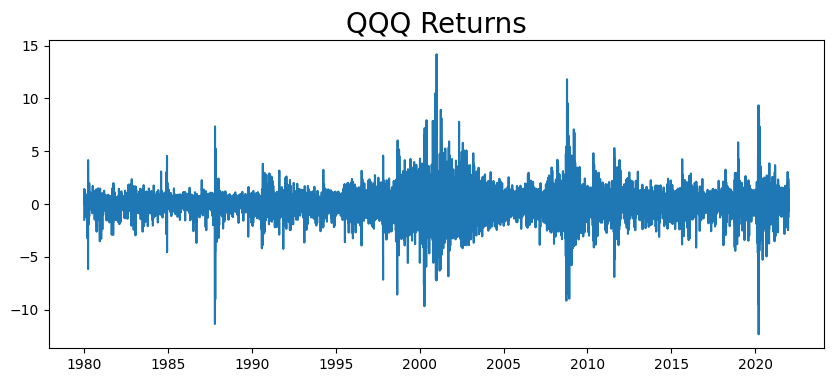

In [3]:
QQQ = web.get_data_yahoo("^IXIC", start = "1980-01-01", end = "2022-01-01")

returns = 100 * QQQ.Close.pct_change().dropna()
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.title('QQQ Returns', fontsize=20)

/Users/niyanth/miniconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


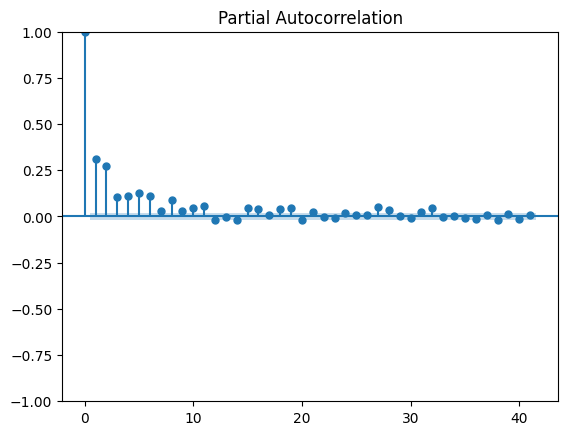

In [4]:
plot_pacf(returns**2)
plt.show()

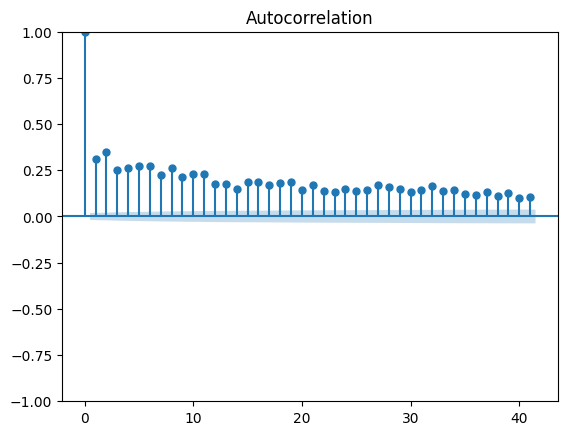

In [5]:
plot_acf(returns**2)
plt.show()

In [10]:
model = arch_model(returns, p=2, q=2)
model_fit = model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 154935.2339969659
Iteration:      2,   Func. Count:     20,   Neg. LLF: 65177.70887737838
Iteration:      3,   Func. Count:     31,   Neg. LLF: 21902.709356346473
Iteration:      4,   Func. Count:     40,   Neg. LLF: 15592.935522769021
Iteration:      5,   Func. Count:     48,   Neg. LLF: 27072.738537394776
Iteration:      6,   Func. Count:     57,   Neg. LLF: 15694.206454729207
Iteration:      7,   Func. Count:     66,   Neg. LLF: 15627.227568890292
Iteration:      8,   Func. Count:     74,   Neg. LLF: 15226.123927165943
Iteration:      9,   Func. Count:     81,   Neg. LLF: 15226.569289809062
Iteration:     10,   Func. Count:     90,   Neg. LLF: 15225.795833175374
Iteration:     11,   Func. Count:     98,   Neg. LLF: 15225.718988143275
Iteration:     12,   Func. Count:    105,   Neg. LLF: 15225.723271616882
Iteration:     13,   Func. Count:    113,   Neg. LLF: 15225.714451388469
Iteration:     14,   Func. Count:    120,   Neg. LLF:

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -15225.7
Distribution:                  Normal   AIC:                           30463.4
Method:            Maximum Likelihood   BIC:                           30507.0
                                        No. Observations:                10591
Date:                Sun, Jan 15 2023   Df Residuals:                    10590
Time:                        17:21:14   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0829  9.252e-03      8.963  3.169e-19 [6.479e-02,  0.101]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0434  7.283e-03      5.961  2.500e-09 [2.914e-02,5.769e-02]
alpha[1]       0.1156  1.624e-02      7.122  1.067e-12   [8.381e-02,  0.147]
alpha[2]       0.1129  1.421e-02      7.945  1.942e-15   [8.504e-02,  0.141]
beta[1]        0.0530  5.124e-02      1.035      0.301  [-4.741e-02,  0.153]
beta[2]        0.6942  4.571e-02     15.188  4.240e-52     [  0.605,  0.784]
============================================================================

Covariance estimator: robust
"""

In [16]:
model = arch_model(returns,vol = "EGARCH", p=2, q=2)
model_fit = model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 325908047604005.1
Iteration:      2,   Func. Count:     20,   Neg. LLF: 7285155896367.3125
Iteration:      3,   Func. Count:     31,   Neg. LLF: 50208785086727.92
Iteration:      4,   Func. Count:     42,   Neg. LLF: 170115252134.04083
Iteration:      5,   Func. Count:     53,   Neg. LLF: 28373.36781526321
Iteration:      6,   Func. Count:     63,   Neg. LLF: 5819154731.426199
Iteration:      7,   Func. Count:     71,   Neg. LLF: 15267.418910651904
Iteration:      8,   Func. Count:     79,   Neg. LLF: 15255.59675144004
Iteration:      9,   Func. Count:     86,   Neg. LLF: 15264.60834183875
Iteration:     10,   Func. Count:     94,   Neg. LLF: 15263.768298437277
Iteration:     11,   Func. Count:    102,   Neg. LLF: 15263.320097750062
Iteration:     12,   Func. Count:    110,   Neg. LLF: 15262.93846788225
Iteration:     13,   Func. Count:    118,   Neg. LLF: 15262.121351321059
Iteration:     14,   Func. Count:    126,   Neg. LLF: 1525

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - EGARCH Model Results                     
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:               -15255.2
Distribution:                  Normal   AIC:                           30522.3
Method:            Maximum Likelihood   BIC:                           30565.9
                                        No. Observations:                10591
Date:                Sun, Jan 15 2023   Df Residuals:                    10590
Time:                        17:21:58   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0842  9.455e-03      8.906  5.275e-19 [6.568e-02,  0.103]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0218  5.010e-03      4.348  1.376e-05 [1.196e-02,3.160e-02]
alpha[1]       0.2376  2.839e-02      8.369  5.830e-17     [  0.182,  0.293]
alpha[2]       0.2236  2.311e-02      9.675  3.867e-22     [  0.178,  0.269]
beta[1]        0.1074  4.220e-02      2.546  1.089e-02   [2.474e-02,  0.190]
beta[2]        0.8524  4.243e-02     20.091  8.879e-90     [  0.769,  0.936]
============================================================================

Covariance estimator: robust
"""

In [18]:
model = arch_model(returns, p=2, o=1, q=2)
model_fit = model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:      9,   Neg. LLF: 90149.56711214416
Iteration:      2,   Func. Count:     22,   Neg. LLF: 66258.11649309007
Iteration:      3,   Func. Count:     34,   Neg. LLF: 24902.84135777896
Iteration:      4,   Func. Count:     45,   Neg. LLF: 37278.281237248855
Iteration:      5,   Func. Count:     54,   Neg. LLF: 15928.072349444428
Iteration:      6,   Func. Count:     64,   Neg. LLF: 15250.13868751768
Iteration:      7,   Func. Count:     73,   Neg. LLF: 15168.84106703288
Iteration:      8,   Func. Count:     82,   Neg. LLF: 15372.192018243535
Iteration:      9,   Func. Count:     91,   Neg. LLF: 15148.50299207778
Iteration:     10,   Func. Count:    100,   Neg. LLF: 15167.134658306724
Iteration:     11,   Func. Count:    109,   Neg. LLF: 15144.31208848086
Iteration:     12,   Func. Count:    118,   Neg. LLF: 15143.648576354877
Iteration:     13,   Func. Count:    126,   Neg. LLF: 15143.647406805168
Iteration:     14,   Func. Count:    134,   Neg. LLF: 1514

<class 'statsmodels.iolib.summary.Summary'>
"""
                   Constant Mean - GJR-GARCH Model Results                    
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -15143.6
Distribution:                  Normal   AIC:                           30301.3
Method:            Maximum Likelihood   BIC:                           30352.2
                                        No. Observations:                10591
Date:                Sun, Jan 15 2023   Df Residuals:                    10590
Time:                        17:22:37   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0636  8.787e-03      7.233  4.731e-13 [4.633e-02,8.078e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0346  6.317e-03      5.481  4.226e-08  [2.224e-02,4.701e-02]
alpha[1]       0.0309  1.933e-02      1.601      0.109 [-6.937e-03,6.884e-02]
alpha[2]       0.0492  2.469e-02      1.993  4.627e-02  [8.137e-04,9.761e-02]
gamma[1]       0.1511  2.570e-02      5.879  4.125e-09      [  0.101,  0.201]
beta[1]        0.5593      0.138      4.056  4.997e-05      [  0.289,  0.830]
beta[2]        0.2595      0.121      2.152  3.136e-02    [2.321e-02,  0.496]
=============================================================================

Covariance estimator: robust
"""

In [19]:
(len(returns))

10591

In [20]:
split_time_1 = 8464
split_time_2 = 10580

train_idx = returns.index[:split_time_1]
val_idx = returns.index[split_time_1:split_time_2]
test_idx = returns.index[split_time_2:]

In [21]:
returns.index[8464]
ts_train = returns[train_idx]
ts_val = returns[val_idx]
ts_test = returns[test_idx]

In [23]:
def get_volatility(ts, window=None):
    """
    Get the volatility of a time series as the standard deviation of an index's
    price returns using cumulative moving average or rolling window average
    depending on whether or not window parameter is specified
    """
    if window:
        ma = ts.rolling(window).mean()
    else:
        ma = ts.expanding().mean()
    output = ((ts - ma)**2)**.5

    return output

In [24]:
WINDOW_SIZE = 14

# CALCULATING VOLATILITY ON A 14 DAY PERIOD
vols = get_volatility(returns, window=WINDOW_SIZE)

vol_train = vols[train_idx]
vol_val = vols[val_idx]
vol_test = vols[test_idx]

In [25]:
vol_train = vol_train.dropna()
vol_train

Date
1980-01-22    0.686422
1980-01-23    0.415767
1980-01-24    0.057271
1980-01-25    0.226964
1980-01-28    0.164622
                ...   
2013-07-17    0.160910
2013-07-18    0.393317
2013-07-19    1.034483
2013-07-22    0.017304
2013-07-23    0.885883
Name: Close, Length: 8451, dtype: float64

In [26]:
len(vol_train)

8451

In [27]:
ma = returns.rolling(WINDOW_SIZE).mean()
ewma = returns.ewm(span=WINDOW_SIZE).mean()

In [28]:
def RMSE(y_true, y_pred):
    """
    Compute Root Mean Squared Error between 2 arrays
    """
    output = np.sqrt(mse(y_true, y_pred))
    return output

In [29]:
rolling_forecasts = []

# ITERATE OVER EACH TIME STEP IN THE VALIDATION SET
for i in range(len(ts_val)):

    # GET THE DATA AT ALL PREVIOUS TIME STEPS
    idx = val_idx[i]
    ts_train = returns[:idx]

    # TRAIN MODEL USING ALL PREVIOUS TIME STEPS' DATA
    model = arch_model(ts_train, vol='GARCH', p=2, q=2,
                       mean='constant', dist='normal')
    model_fit = model.fit(disp='off')

    # MAKE PREDICTION
    pred = (model_fit.forecast(horizon=2, reindex=False).variance.values[0][0])**.5

    # APPEND TO rolling_forecasts LIST
    rolling_forecasts.append(pred)

In [30]:
rolling_predictions = pd.Series(rolling_forecasts, index=ts_val.index)
print(RMSE(vol_val, rolling_predictions))
print(mae(vol_val, rolling_predictions))

0.727288590408378
0.5554406096464968


In [31]:
rolling_forecasts = []

# ITERATE OVER EACH TIME STEP IN THE VALIDATION SET
for i in range(len(ts_val)):

    # GET THE DATA AT ALL PREVIOUS TIME STEPS
    idx = val_idx[i]
    ts_train = returns[:idx]

    # TRAIN MODEL USING ALL PREVIOUS TIME STEPS' DATA
    model = arch_model(ts_train, vol='EGARCH', p=2, q=2,
                       mean='constant', dist='normal')
    model_fit = model.fit(disp='off')

    # MAKE PREDICTION
    pred = (model_fit.forecast(horizon=1, reindex=False).variance.values[0][0])**.5

    # APPEND TO rolling_forecasts LIST
    rolling_forecasts.append(pred)

In [32]:
rolling_predictions = pd.Series(rolling_forecasts, index=ts_val.index)
print(RMSE(vol_val, rolling_predictions))
print(mae(vol_val, rolling_predictions))

0.7156562375927982
0.5490881644291158


In [33]:
rolling_forecasts = []

# ITERATE OVER EACH TIME STEP IN THE VALIDATION SET
for i in range(len(ts_val)):

    # GET THE DATA AT ALL PREVIOUS TIME STEPS
    idx = val_idx[i]
    ts_train = returns[:idx]

    # TRAIN MODEL USING ALL PREVIOUS TIME STEPS' DATA
    model = arch_model(ts_train, vol='GARCH', p=2,o=1,q=2,
                       mean='constant', dist='normal')
    model_fit = model.fit(disp='off')

    # MAKE PREDICTION
    pred = (model_fit.forecast(horizon=1, reindex=False).variance.values[0][0])**.5

    # APPEND TO rolling_forecasts LIST
    rolling_forecasts.append(pred)

In [34]:
rolling_predictions = pd.Series(rolling_forecasts, index=ts_val.index)
print(RMSE(vol_val, rolling_predictions))
print(mae(vol_val, rolling_predictions))

0.7138435485579144
0.5440297908524303


In [35]:
import tensorflow as tf
from tensorflow.python.keras.models import Sequential, load_model
from tensorflow.python.keras.layers.core import Dense
from tensorflow.python.keras.layers.recurrent import LSTM
from tensorflow.python.keras import optimizers
from tensorflow.python.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import seaborn as sns
from keras.optimizers import adam_v2

In [36]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size+1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size+1))
    dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
    dataset = dataset.batch(batch_size).prefetch(1)
    
    return dataset

In [60]:
window_size = 14
batch_size = 10
shuffle_buffer_size = 1000


dataset = windowed_dataset(vol_train, window_size, batch_size, shuffle_buffer_size)
val_dataset = windowed_dataset(vol_val, window_size, 10, 1000)

In [61]:
model = Sequential()

model.add(Dense(1, input_shape=(window_size, ), activation="tanh"))
model.add(Dense(1))


model.compile(loss='mse', optimizer='adam', metrics=[tf.keras.metrics.MeanSquaredError()])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 1)                 15        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 2         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In [62]:
history = model.fit(dataset, epochs=150, validation_data = val_dataset, verbose=1)

Epoch 1/150
844/844 [==============================] - 1s 547us/step - loss: 1.5538 - mean_squared_error: 2.0464 - val_loss: 0.8806 - val_mean_squared_error: 1.4772
Epoch 2/150
844/844 [==============================] - 0s 489us/step - loss: 0.9439 - mean_squared_error: 1.2377 - val_loss: 0.7861 - val_mean_squared_error: 1.1793
Epoch 3/150
844/844 [==============================] - 0s 485us/step - loss: 0.9070 - mean_squared_error: 1.0939 - val_loss: 0.7603 - val_mean_squared_error: 1.0770
Epoch 4/150
844/844 [==============================] - 0s 478us/step - loss: 0.8769 - mean_squared_error: 1.0260 - val_loss: 0.7182 - val_mean_squared_error: 1.0177
Epoch 5/150
844/844 [==============================] - 0s 487us/step - loss: 0.8248 - mean_squared_error: 0.9805 - val_loss: 0.6756 - val_mean_squared_error: 0.9742
Epoch 6/150
844/844 [==============================] - 0s 480us/step - loss: 0.7758 - mean_squared_error: 0.9422 - val_loss: 0.6528 - val_mean_squared_error: 0.9370
Epoch 7/15

844/844 [==============================] - 0s 481us/step - loss: 0.7307 - mean_squared_error: 0.7359 - val_loss: 0.6064 - val_mean_squared_error: 0.7367
Epoch 51/150
844/844 [==============================] - 0s 479us/step - loss: 0.7287 - mean_squared_error: 0.7353 - val_loss: 0.6091 - val_mean_squared_error: 0.7360
Epoch 52/150
844/844 [==============================] - 0s 480us/step - loss: 0.7303 - mean_squared_error: 0.7348 - val_loss: 0.6148 - val_mean_squared_error: 0.7355
Epoch 53/150
844/844 [==============================] - 0s 480us/step - loss: 0.7312 - mean_squared_error: 0.7341 - val_loss: 0.6144 - val_mean_squared_error: 0.7350
Epoch 54/150
844/844 [==============================] - 0s 485us/step - loss: 0.7314 - mean_squared_error: 0.7336 - val_loss: 0.6120 - val_mean_squared_error: 0.7346
Epoch 55/150
844/844 [==============================] - 0s 475us/step - loss: 0.7298 - mean_squared_error: 0.7332 - val_loss: 0.6161 - val_mean_squared_error: 0.7339
Epoch 56/150
844/

844/844 [==============================] - 0s 486us/step - loss: 0.7276 - mean_squared_error: 0.7206 - val_loss: 0.6043 - val_mean_squared_error: 0.7211
Epoch 100/150
844/844 [==============================] - 0s 478us/step - loss: 0.7283 - mean_squared_error: 0.7205 - val_loss: 0.6046 - val_mean_squared_error: 0.7210
Epoch 101/150
844/844 [==============================] - 0s 481us/step - loss: 0.7269 - mean_squared_error: 0.7203 - val_loss: 0.6113 - val_mean_squared_error: 0.7208
Epoch 102/150
844/844 [==============================] - 0s 474us/step - loss: 0.7263 - mean_squared_error: 0.7201 - val_loss: 0.6080 - val_mean_squared_error: 0.7206
Epoch 103/150
844/844 [==============================] - 0s 482us/step - loss: 0.7282 - mean_squared_error: 0.7199 - val_loss: 0.6066 - val_mean_squared_error: 0.7205
Epoch 104/150
844/844 [==============================] - 0s 473us/step - loss: 0.7260 - mean_squared_error: 0.7198 - val_loss: 0.6136 - val_mean_squared_error: 0.7203
Epoch 105/15

844/844 [==============================] - 0s 478us/step - loss: 0.7261 - mean_squared_error: 0.7148 - val_loss: 0.6028 - val_mean_squared_error: 0.7151
Epoch 149/150
844/844 [==============================] - 0s 483us/step - loss: 0.7253 - mean_squared_error: 0.7147 - val_loss: 0.6018 - val_mean_squared_error: 0.7151
Epoch 150/150
844/844 [==============================] - 0s 486us/step - loss: 0.7262 - mean_squared_error: 0.7146 - val_loss: 0.6040 - val_mean_squared_error: 0.7150


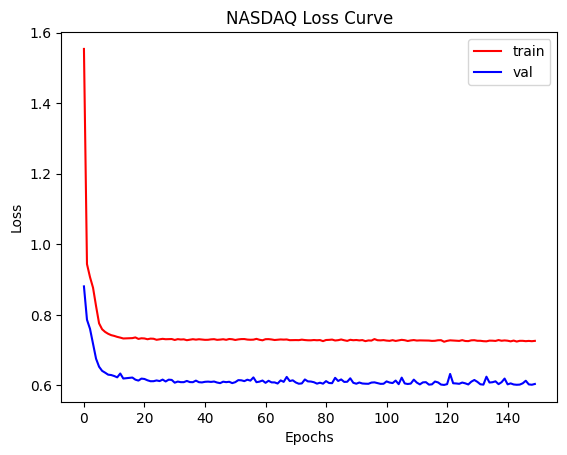

In [63]:
def plot_error(train_loss, val_loss):
    plt.plot(train_loss,c = 'r')
    plt.plot(val_loss,c = 'b')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.title("NASDAQ Loss Curve")
    plt.legend(['train', 'val'],loc = 'upper right')
    #plt.savefig('Thesis Document\\KF5 Figures\\NN (5,1,1)\\' + sector + '\\' + sector + ' - NN(5,1,1) Train vs. Validation.png')
    plt.show()

train_error = history.history['loss']
val_error = history.history['val_loss']
plot_error(train_error, val_error)

In [64]:
rolling_forecasts = []

# ITERATE OVER EACH TIME STEP IN THE VALIDATION SET
for i in range(len(ts_val)):

    # GET THE DATA AT ALL PREVIOUS TIME STEPS
    idx = val_idx[i]
    ts_train = returns[:idx]

    # TRAIN MODEL USING ALL PREVIOUS TIME STEPS' DATA
    model = arch_model(ts_train, vol='GARCH', p=2, q=2,
                       mean='constant', dist='normal')
    model_fit = model.fit(disp='off')

    # MAKE PREDICTION
    pred = (model_fit.forecast(horizon=1, reindex=False).variance.values[0][0])**.5

    # APPEND TO rolling_forecasts LIST
    rolling_forecasts.append(pred)

In [65]:
dataset = windowed_dataset(rolling_forecasts, window_size, batch_size, shuffle_buffer_size)
val_dataset = windowed_dataset(rolling_forecasts, window_size, 10, 1000)

In [66]:
model = Sequential()

model.add(Dense(1, input_shape=(window_size, ), activation="tanh"))
model.add(Dense(1))


model.compile(loss='mae', optimizer='adam', metrics=[tf.keras.metrics.MeanSquaredError()])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 1)                 15        
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 2         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In [67]:
history2 = model.fit(dataset, epochs=150, validation_data = val_dataset, verbose=1)

Epoch 1/150
211/211 [==============================] - 0s 1ms/step - loss: 0.5720 - mean_squared_error: 1.1847 - val_loss: 0.2494 - val_mean_squared_error: 0.5550
Epoch 2/150
211/211 [==============================] - 0s 747us/step - loss: 0.2390 - mean_squared_error: 0.4471 - val_loss: 0.2295 - val_mean_squared_error: 0.3952
Epoch 3/150
211/211 [==============================] - 0s 755us/step - loss: 0.2177 - mean_squared_error: 0.3637 - val_loss: 0.2068 - val_mean_squared_error: 0.3399
Epoch 4/150
211/211 [==============================] - 0s 776us/step - loss: 0.1960 - mean_squared_error: 0.3237 - val_loss: 0.1871 - val_mean_squared_error: 0.3108
Epoch 5/150
211/211 [==============================] - 0s 772us/step - loss: 0.1761 - mean_squared_error: 0.2975 - val_loss: 0.1690 - val_mean_squared_error: 0.2876
Epoch 6/150
211/211 [==============================] - 0s 764us/step - loss: 0.1582 - mean_squared_error: 0.2769 - val_loss: 0.1599 - val_mean_squared_error: 0.2679
Epoch 7/150


211/211 [==============================] - 0s 771us/step - loss: 0.0991 - mean_squared_error: 0.1278 - val_loss: 0.0974 - val_mean_squared_error: 0.1273
Epoch 51/150
211/211 [==============================] - 0s 757us/step - loss: 0.0978 - mean_squared_error: 0.1269 - val_loss: 0.0960 - val_mean_squared_error: 0.1265
Epoch 52/150
211/211 [==============================] - 0s 757us/step - loss: 0.0976 - mean_squared_error: 0.1261 - val_loss: 0.0954 - val_mean_squared_error: 0.1256
Epoch 53/150
211/211 [==============================] - 0s 769us/step - loss: 0.0971 - mean_squared_error: 0.1252 - val_loss: 0.0947 - val_mean_squared_error: 0.1248
Epoch 54/150
211/211 [==============================] - 0s 755us/step - loss: 0.0963 - mean_squared_error: 0.1244 - val_loss: 0.1001 - val_mean_squared_error: 0.1240
Epoch 55/150
211/211 [==============================] - 0s 762us/step - loss: 0.0969 - mean_squared_error: 0.1236 - val_loss: 0.0943 - val_mean_squared_error: 0.1232
Epoch 56/150
211/

211/211 [==============================] - 0s 810us/step - loss: 0.0759 - mean_squared_error: 0.0980 - val_loss: 0.0747 - val_mean_squared_error: 0.0978
Epoch 100/150
211/211 [==============================] - 0s 825us/step - loss: 0.0754 - mean_squared_error: 0.0975 - val_loss: 0.0795 - val_mean_squared_error: 0.0973
Epoch 101/150
211/211 [==============================] - 0s 815us/step - loss: 0.0762 - mean_squared_error: 0.0971 - val_loss: 0.0732 - val_mean_squared_error: 0.0968
Epoch 102/150
211/211 [==============================] - 0s 796us/step - loss: 0.0747 - mean_squared_error: 0.0966 - val_loss: 0.0730 - val_mean_squared_error: 0.0964
Epoch 103/150
211/211 [==============================] - 0s 804us/step - loss: 0.0763 - mean_squared_error: 0.0962 - val_loss: 0.0767 - val_mean_squared_error: 0.0959
Epoch 104/150
211/211 [==============================] - 0s 764us/step - loss: 0.0768 - mean_squared_error: 0.0957 - val_loss: 0.0748 - val_mean_squared_error: 0.0955
Epoch 105/15

211/211 [==============================] - 0s 749us/step - loss: 0.0667 - mean_squared_error: 0.0795 - val_loss: 0.0647 - val_mean_squared_error: 0.0794
Epoch 149/150
211/211 [==============================] - 0s 745us/step - loss: 0.0675 - mean_squared_error: 0.0792 - val_loss: 0.0809 - val_mean_squared_error: 0.0791
Epoch 150/150
211/211 [==============================] - 0s 746us/step - loss: 0.0670 - mean_squared_error: 0.0789 - val_loss: 0.0780 - val_mean_squared_error: 0.0788


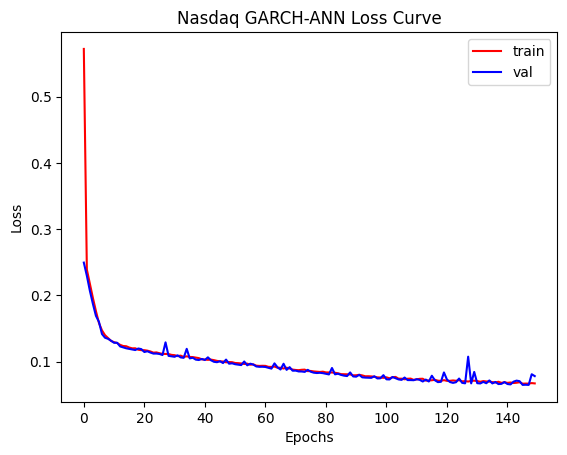

In [68]:
def plot_error(train_loss, val_loss):
    plt.plot(train_loss,c = 'r')
    plt.plot(val_loss,c = 'b')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.title("Nasdaq GARCH-ANN Loss Curve")
    plt.legend(['train', 'val'],loc = 'upper right')
    #plt.savefig('Thesis Document\\KF5 Figures\\NN (5,1,1)\\' + sector + '\\' + sector + ' - NN(5,1,1) Train vs. Validation.png')
    plt.show()
train_error2 = history2.history['loss']
val_error2 = history2.history['val_loss']
plot_error(train_error2, val_error2)

In [46]:
rolling_forecasts = []

# ITERATE OVER EACH TIME STEP IN THE VALIDATION SET
for i in range(len(ts_val)):

    # GET THE DATA AT ALL PREVIOUS TIME STEPS
    idx = val_idx[i]
    ts_train = returns[:idx]

    # TRAIN MODEL USING ALL PREVIOUS TIME STEPS' DATA
    model = arch_model(ts_train, vol='EGARCH', p=2, q=2,
                       mean='constant', dist='normal')
    model_fit = model.fit(disp='off')

    # MAKE PREDICTION
    pred = (model_fit.forecast(horizon=1, reindex=False).variance.values[0][0])**.5

    # APPEND TO rolling_forecasts LIST
    rolling_forecasts.append(pred)

In [47]:
dataset = windowed_dataset(rolling_forecasts, window_size, batch_size, shuffle_buffer_size)
val_dataset = windowed_dataset(rolling_forecasts, window_size, 10, 1000)

In [48]:
model = Sequential()

model.add(Dense(1, input_shape=(window_size, ), activation="tanh"))
# model.add(Dense(4, activation="sigmoid"))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam', metrics=[tf.keras.metrics.MeanSquaredError()])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 15        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 2         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In [49]:
history2 = model.fit(dataset, epochs=150, validation_data = val_dataset, verbose=1)

Epoch 1/150
211/211 [==============================] - 0s 1ms/step - loss: 0.7772 - mean_squared_error: 0.8833 - val_loss: 0.5497 - val_mean_squared_error: 0.7716
Epoch 2/150
211/211 [==============================] - 0s 832us/step - loss: 0.4068 - mean_squared_error: 0.6706 - val_loss: 0.3396 - val_mean_squared_error: 0.5879
Epoch 3/150
211/211 [==============================] - 0s 801us/step - loss: 0.3281 - mean_squared_error: 0.5323 - val_loss: 0.3150 - val_mean_squared_error: 0.4918
Epoch 4/150
211/211 [==============================] - 0s 840us/step - loss: 0.2970 - mean_squared_error: 0.4631 - val_loss: 0.2814 - val_mean_squared_error: 0.4372
Epoch 5/150
211/211 [==============================] - 0s 811us/step - loss: 0.2665 - mean_squared_error: 0.4171 - val_loss: 0.2538 - val_mean_squared_error: 0.3987
Epoch 6/150
211/211 [==============================] - 0s 789us/step - loss: 0.2395 - mean_squared_error: 0.3821 - val_loss: 0.2266 - val_mean_squared_error: 0.3679
Epoch 7/150


211/211 [==============================] - 0s 819us/step - loss: 0.0901 - mean_squared_error: 0.1185 - val_loss: 0.0891 - val_mean_squared_error: 0.1179
Epoch 51/150
211/211 [==============================] - 0s 802us/step - loss: 0.0903 - mean_squared_error: 0.1172 - val_loss: 0.0943 - val_mean_squared_error: 0.1166
Epoch 52/150
211/211 [==============================] - 0s 789us/step - loss: 0.0899 - mean_squared_error: 0.1160 - val_loss: 0.0908 - val_mean_squared_error: 0.1154
Epoch 53/150
211/211 [==============================] - 0s 801us/step - loss: 0.0901 - mean_squared_error: 0.1147 - val_loss: 0.0896 - val_mean_squared_error: 0.1141
Epoch 54/150
211/211 [==============================] - 0s 809us/step - loss: 0.0896 - mean_squared_error: 0.1136 - val_loss: 0.0905 - val_mean_squared_error: 0.1129
Epoch 55/150
211/211 [==============================] - 0s 793us/step - loss: 0.0893 - mean_squared_error: 0.1124 - val_loss: 0.0877 - val_mean_squared_error: 0.1118
Epoch 56/150
211/

211/211 [==============================] - 0s 830us/step - loss: 0.0827 - mean_squared_error: 0.0804 - val_loss: 0.0809 - val_mean_squared_error: 0.0802
Epoch 100/150
211/211 [==============================] - 0s 800us/step - loss: 0.0823 - mean_squared_error: 0.0799 - val_loss: 0.0816 - val_mean_squared_error: 0.0797
Epoch 101/150
211/211 [==============================] - 0s 800us/step - loss: 0.0835 - mean_squared_error: 0.0795 - val_loss: 0.0806 - val_mean_squared_error: 0.0793
Epoch 102/150
211/211 [==============================] - 0s 807us/step - loss: 0.0817 - mean_squared_error: 0.0790 - val_loss: 0.0831 - val_mean_squared_error: 0.0788
Epoch 103/150
211/211 [==============================] - 0s 812us/step - loss: 0.0826 - mean_squared_error: 0.0786 - val_loss: 0.0867 - val_mean_squared_error: 0.0783
Epoch 104/150
211/211 [==============================] - 0s 805us/step - loss: 0.0837 - mean_squared_error: 0.0781 - val_loss: 0.0805 - val_mean_squared_error: 0.0779
Epoch 105/15

211/211 [==============================] - 0s 837us/step - loss: 0.0796 - mean_squared_error: 0.0634 - val_loss: 0.0828 - val_mean_squared_error: 0.0633
Epoch 149/150
211/211 [==============================] - 0s 826us/step - loss: 0.0802 - mean_squared_error: 0.0632 - val_loss: 0.0799 - val_mean_squared_error: 0.0630
Epoch 150/150
211/211 [==============================] - 0s 826us/step - loss: 0.0796 - mean_squared_error: 0.0629 - val_loss: 0.0801 - val_mean_squared_error: 0.0628


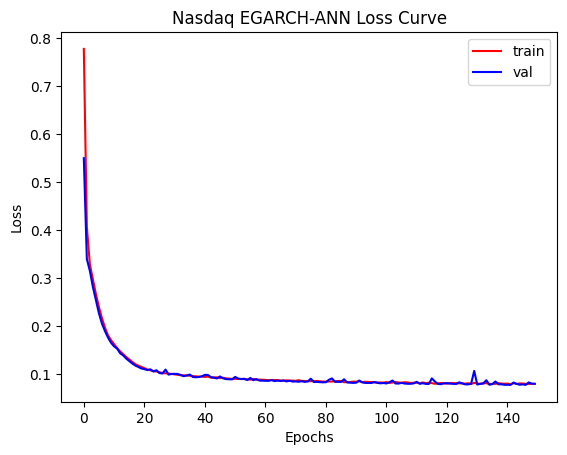

In [50]:
def plot_error(train_loss, val_loss):
    plt.plot(train_loss,c = 'r')
    plt.plot(val_loss,c = 'b')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.title("Nasdaq EGARCH-ANN Loss Curve")
    plt.legend(['train', 'val'],loc = 'upper right')
    #plt.savefig('Thesis Document\\KF5 Figures\\NN (5,1,1)\\' + sector + '\\' + sector + ' - NN(5,1,1) Train vs. Validation.png')
    plt.show()
train_error2 = history2.history['loss']
val_error2 = history2.history['val_loss']
plot_error(train_error2, val_error2)

In [51]:
rolling_forecasts = []

# ITERATE OVER EACH TIME STEP IN THE VALIDATION SET
for i in range(len(ts_val)):

    # GET THE DATA AT ALL PREVIOUS TIME STEPS
    idx = val_idx[i]
    ts_train = returns[:idx]

    # TRAIN MODEL USING ALL PREVIOUS TIME STEPS' DATA
    model = arch_model(ts_train, p=2,o=1, q=2,
                       mean='constant', dist='normal')
    model_fit = model.fit(disp='off')

    # MAKE PREDICTION
    pred = (model_fit.forecast(horizon=1, reindex=False).variance.values[0][0])**.5

    # APPEND TO rolling_forecasts LIST
    rolling_forecasts.append(pred)

In [56]:
rolling_forecasts = pd.Series(rolling_forecasts, index=ts_val.index)
dataset = windowed_dataset(rolling_forecasts, window_size, batch_size, shuffle_buffer_size)
val_dataset = windowed_dataset(rolling_forecasts, window_size, 10, 1000)

In [57]:
model = Sequential()

model.add(Dense(1, input_shape=(window_size, ), activation="tanh"))
# model.add(Dense(4, activation="sigmoid"))
model.add(Dense(1))
opt = adam_v2.Adam(learning_rate=0.01, decay=1e-6)



model.compile(loss='mse', optimizer='adam', metrics=[tf.keras.metrics.MeanSquaredError()])



model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1)                 15        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 2         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In [58]:
history2 = model.fit(dataset, epochs=150, validation_data = val_dataset, verbose=1)

Epoch 1/150
211/211 [==============================] - 0s 1ms/step - loss: 0.4108 - mean_squared_error: 0.4201 - val_loss: 0.3315 - val_mean_squared_error: 0.3615
Epoch 2/150
211/211 [==============================] - 0s 861us/step - loss: 0.3250 - mean_squared_error: 0.3558 - val_loss: 0.3172 - val_mean_squared_error: 0.3442
Epoch 3/150
211/211 [==============================] - 0s 875us/step - loss: 0.3106 - mean_squared_error: 0.3378 - val_loss: 0.3033 - val_mean_squared_error: 0.3302
Epoch 4/150
211/211 [==============================] - 0s 877us/step - loss: 0.2951 - mean_squared_error: 0.3239 - val_loss: 0.2885 - val_mean_squared_error: 0.3226
Epoch 5/150
211/211 [==============================] - 0s 862us/step - loss: 0.2758 - mean_squared_error: 0.3185 - val_loss: 0.2635 - val_mean_squared_error: 0.3111
Epoch 6/150
211/211 [==============================] - 0s 852us/step - loss: 0.2510 - mean_squared_error: 0.3068 - val_loss: 0.2366 - val_mean_squared_error: 0.3013
Epoch 7/150


211/211 [==============================] - 0s 858us/step - loss: 0.0419 - mean_squared_error: 0.1181 - val_loss: 0.0406 - val_mean_squared_error: 0.1173
Epoch 51/150
211/211 [==============================] - 0s 865us/step - loss: 0.0406 - mean_squared_error: 0.1166 - val_loss: 0.0411 - val_mean_squared_error: 0.1158
Epoch 52/150
211/211 [==============================] - 0s 853us/step - loss: 0.0407 - mean_squared_error: 0.1151 - val_loss: 0.0389 - val_mean_squared_error: 0.1144
Epoch 53/150
211/211 [==============================] - 0s 864us/step - loss: 0.0397 - mean_squared_error: 0.1136 - val_loss: 0.0375 - val_mean_squared_error: 0.1129
Epoch 54/150
211/211 [==============================] - 0s 873us/step - loss: 0.0387 - mean_squared_error: 0.1122 - val_loss: 0.0377 - val_mean_squared_error: 0.1115
Epoch 55/150
211/211 [==============================] - 0s 860us/step - loss: 0.0373 - mean_squared_error: 0.1108 - val_loss: 0.0360 - val_mean_squared_error: 0.1102
Epoch 56/150
211/

211/211 [==============================] - 0s 870us/step - loss: 0.0236 - mean_squared_error: 0.0739 - val_loss: 0.0225 - val_mean_squared_error: 0.0736
Epoch 100/150
211/211 [==============================] - 0s 859us/step - loss: 0.0249 - mean_squared_error: 0.0734 - val_loss: 0.0248 - val_mean_squared_error: 0.0731
Epoch 101/150
211/211 [==============================] - 0s 866us/step - loss: 0.0239 - mean_squared_error: 0.0729 - val_loss: 0.0223 - val_mean_squared_error: 0.0726
Epoch 102/150
211/211 [==============================] - 0s 857us/step - loss: 0.0246 - mean_squared_error: 0.0724 - val_loss: 0.0226 - val_mean_squared_error: 0.0721
Epoch 103/150
211/211 [==============================] - 0s 865us/step - loss: 0.0236 - mean_squared_error: 0.0719 - val_loss: 0.0224 - val_mean_squared_error: 0.0717
Epoch 104/150
211/211 [==============================] - 0s 856us/step - loss: 0.0230 - mean_squared_error: 0.0714 - val_loss: 0.0274 - val_mean_squared_error: 0.0712
Epoch 105/15

211/211 [==============================] - 0s 861us/step - loss: 0.0216 - mean_squared_error: 0.0569 - val_loss: 0.0224 - val_mean_squared_error: 0.0567
Epoch 149/150
211/211 [==============================] - 0s 865us/step - loss: 0.0216 - mean_squared_error: 0.0566 - val_loss: 0.0205 - val_mean_squared_error: 0.0565
Epoch 150/150
211/211 [==============================] - 0s 859us/step - loss: 0.0218 - mean_squared_error: 0.0564 - val_loss: 0.0204 - val_mean_squared_error: 0.0563


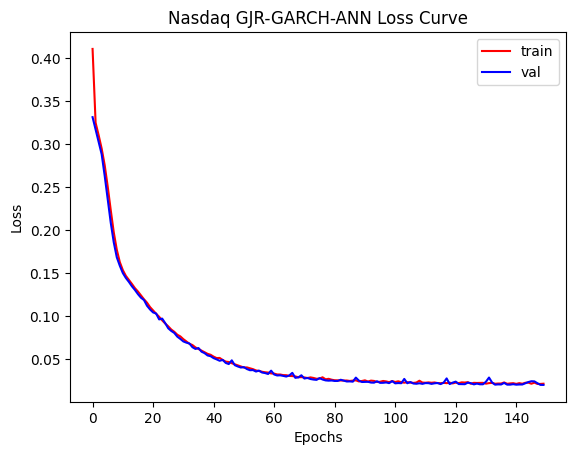

In [59]:
def plot_error(train_loss, val_loss):
    plt.plot(train_loss,c = 'r')
    plt.plot(val_loss,c = 'b')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.title("Nasdaq GJR-GARCH-ANN Loss Curve")
    plt.legend(['train', 'val'],loc = 'upper right')
    #plt.savefig('Thesis Document\\KF5 Figures\\NN (5,1,1)\\' + sector + '\\' + sector + ' - NN(5,1,1) Train vs. Validation.png')
    plt.show()
train_error2 = history2.history['loss']
val_error2 = history2.history['val_loss']
plot_error(train_error2, val_error2)